# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# set up the url
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + weather_api_key
# test_response = requests.get(url + "&q=london&units=Imperial")
# test_json = test_response.json()
# print(json.dumps(test_json, indent=4, sort_keys=True))

# Initialize lists to hold response info for the data frame
city_name = []
country = []
lat = []
lon = []
dt = []
clouds = []
humidity = []
temp_max = []
wind_speed = []
count = 0
set_count = 0

# Loop through the list of cities and perform a request
for city in cities:
    weather_response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        # Process the Records
        city_name.append(weather_json['city']['name'])
        country.append(weather_json['city']['country'])
        lat.append(weather_json['city']['coord']['lat'])
        lon.append(weather_json['city']['coord']['lon'])
        dt.append(weather_json['list'][0]['dt'])
        clouds.append(weather_json['list'][0]['clouds']['all'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        temp_max.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count += 1
        print(f"Processing record {count} of Set {set_count} | {city}")
        if (count % 50) == 0:
            set_count += 1
            count = 0
    except:
        # Flag an error if there is an issue processing the JSON file
        print(f"Error processing record for city {city}") 

Processing record 1 of Set 0 | tasiilaq
Error processing record for city taolanaro
Processing record 2 of Set 0 | am timan
Processing record 3 of Set 0 | evensk
Processing record 4 of Set 0 | wollongong
Error processing record for city daxian
Processing record 5 of Set 0 | punta arenas
Processing record 6 of Set 0 | ereymentau
Processing record 7 of Set 0 | ushuaia
Processing record 8 of Set 0 | cherskiy
Processing record 9 of Set 0 | umm lajj
Error processing record for city coalcoman
Processing record 10 of Set 0 | husavik
Error processing record for city babanusah
Processing record 11 of Set 0 | yellowknife
Processing record 12 of Set 0 | port hedland
Processing record 13 of Set 0 | rikitea
Processing record 14 of Set 0 | kandana
Processing record 15 of Set 0 | albany
Processing record 16 of Set 0 | young
Processing record 17 of Set 0 | jamestown
Processing record 18 of Set 0 | ancud
Processing record 19 of Set 0 | margate
Processing record 20 of Set 0 | san quintin
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_data_df = pd.DataFrame({
                            "City": city_name,
                            "Lat": lat,
                            "Lng": lon,
                            "Max Temp": temp_max,
                            "Humidity": humidity,
                            "Cloudiness": clouds,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": dt
                         })
city_data_df.index.name = "City_ID"
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tasiilaq,65.6145,-37.6368,26.91,67,0,8.01,GL,1604350800
1,Am Timan,11.0297,20.2827,81.81,34,29,2.55,TD,1604350800
2,Evensk,61.9500,159.2333,25.47,97,99,5.46,RU,1604350800
3,Wollongong,-34.4333,150.8833,61.52,80,24,1.79,AU,1604350800
4,Punta Arenas,-53.1500,-70.9167,56.21,56,87,2.42,CL,1604350800


In [20]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.593301,15.318738,59.037664,69.959292,52.238938,8.630938,1.604351e+09
std,32.819979,91.116933,22.545051,20.375294,37.230563,6.211446,0.000000e+00
min,-54.800000,-175.200000,-15.380000,12.000000,0.000000,0.040000,1.604351e+09
25%,-6.216700,-62.652800,46.940000,58.000000,11.000000,4.250000,1.604351e+09
50%,26.154700,17.944200,65.030000,75.000000,56.000000,7.140000,1.604351e+09
75%,47.674000,92.750000,76.770000,85.000000,88.000000,11.430000,1.604351e+09
max,78.218600,179.316700,95.670000,99.000000,100.000000,37.870000,1.604351e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# Check if there are cities with humidity > 100%
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.593301,15.318738,59.037664,69.959292,52.238938,8.630938,1.604351e+09
std,32.819979,91.116933,22.545051,20.375294,37.230563,6.211446,0.000000e+00
min,-54.800000,-175.200000,-15.380000,12.000000,0.000000,0.040000,1.604351e+09
25%,-6.216700,-62.652800,46.940000,58.000000,11.000000,4.250000,1.604351e+09
50%,26.154700,17.944200,65.030000,75.000000,56.000000,7.140000,1.604351e+09
75%,47.674000,92.750000,76.770000,85.000000,88.000000,11.430000,1.604351e+09
max,78.218600,179.316700,95.670000,99.000000,100.000000,37.870000,1.604351e+09


In [24]:
#  Get the indices of cities that have humidity over 100%; there aren't any, but this is how it would be done
humidity_gt_100_index = city_data_df.index[city_data_df["Humidity"] > 100 ]
humidity_gt_100_index

Int64Index([], dtype='int64', name='City_ID')

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(humidity_gt_100_index, inplace=False)
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tasiilaq,65.6145,-37.6368,26.91,67,0,8.01,GL,1604350800
1,Am Timan,11.0297,20.2827,81.81,34,29,2.55,TD,1604350800
2,Evensk,61.9500,159.2333,25.47,97,99,5.46,RU,1604350800
3,Wollongong,-34.4333,150.8833,61.52,80,24,1.79,AU,1604350800
4,Punta Arenas,-53.1500,-70.9167,56.21,56,87,2.42,CL,1604350800


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observation: What this is showing is to be expected, as we get closer to the equator, temperatures go up. Another thing that is implied in the data is there are fewer northern cities. From the plot we see many fewer dots as we go north or south from the equator.

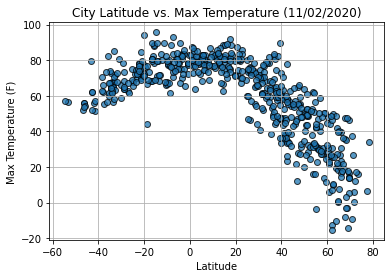

In [43]:
date_secs = clean_city_data_df.iloc[0,8]
date_text_full = str(pd.to_datetime(date_secs, unit='s'))
time_list = date_text_full.split(" ")
# print(time_list[0])
date_list = time_list[0].split("-")
my_date = f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
# print(my_date)

x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Max Temperature {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatvMaxTemp_pyplot.png")
plt.show()

## Latitude vs. Humidity Plot
  
Observation: This is another expected result. The plot shows a notch of overall higher humidity near the equator. The southern hemisphere shows a more even distribution of humidity as we get farther away from the equator versus the northern hemisphere; although it still tends to have more points in the higher humidity range. The northern hemisphere is showing a cluster of high humidity from 40-70 Latitude. This cluster could be due to coastal cities being selected.

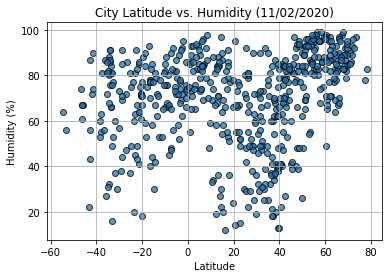

In [44]:
y_axis = clean_city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Humidity {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatvHumidity_pyplot.png")
plt.show()

## Latitude vs. Cloudiness Plot
  
Observation: What this plot shows is there is no clear correlation between Latitude and Cloudiness. Again there is cluster in the northern hemisphere where it is more cloudy. This cluster could be due to the phenonmenon noted above where these may be coastal cities.

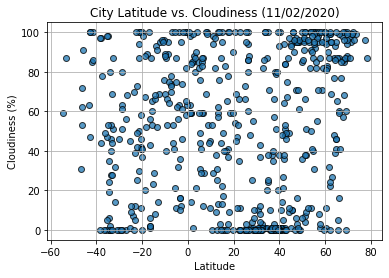

In [45]:
y_axis = clean_city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Cloudiness {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatvCloudiness_pyplot.png")
plt.show()

## Latitude vs. Wind Speed Plot
  
Observation: The plots shows there is very little correlation between latitude and wind speed. We see a fairly even distribution band below 25mph, with a few outliers.

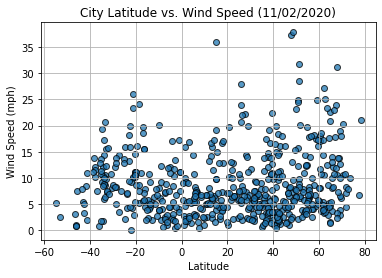

In [46]:
y_axis = clean_city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Wind Speed {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/LatvWindSpeed_pyplot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


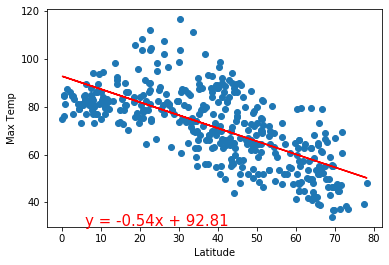

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


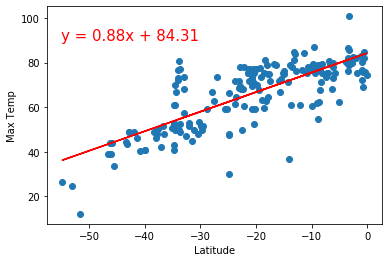

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


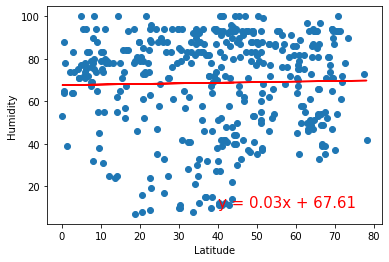

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


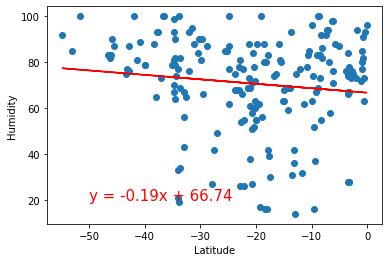

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


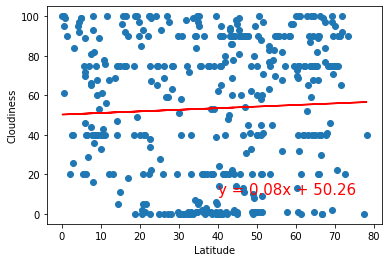

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


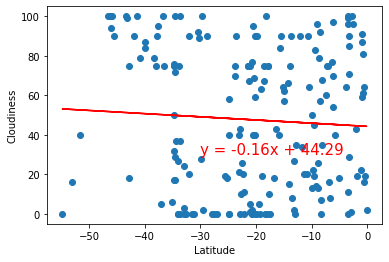

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


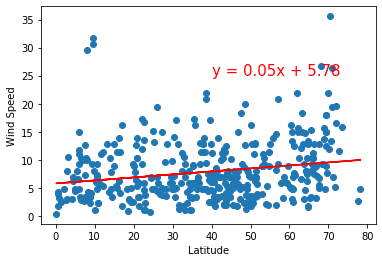

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


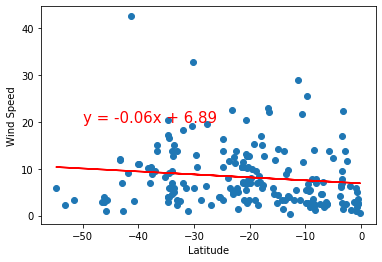